In [1]:
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
df = pd.read_csv("C:/Users/vamsh/Downloads/Iris-f.csv")

In [29]:
df.dropna(inplace=True)

In [30]:
X = df.iloc[:,0:4]
y = df['Species']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1, shuffle = True)

# random_state acts same as random.seed() which would be helpful for generating same random values if it is set to 1
# if it is set to 0, it will take random data (which is to be *AVOIDED* )

#shuffle will shuffle the records for better data split

In [32]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((116, 4), (30, 4), (116,), (30,))

In [33]:
x_train.index

Index([128,  55,  46, 112,  32,  44, 108,  49,  21,  73,
       ...
        29, 138,  75, 133,  83, 137, 141,  76, 144,  41],
      dtype='int64', length=116)

In [34]:
y_train.value_counts()

Species
Iris-virginica     40
Iris-versicolor    39
Iris-setosa        37
Name: count, dtype: int64



# IF we FEEL like there is no equal no of samples for each category to test we can use:
# STRTIFY SAMPLING

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1, shuffle = True, stratify = y)

In [36]:
y_train.value_counts()

Species
Iris-virginica     40
Iris-versicolor    40
Iris-setosa        36
Name: count, dtype: int64

In [29]:
df1 = pd.read_csv("C:/Users/vamsh/Downloads/Housing.csv")

In [30]:
df1

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,542,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no
542,543,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no
543,544,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
544,545,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no


In [31]:
del df1['Unnamed: 0']

In [32]:
df1

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no
542,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no
543,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
544,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no


initial Inspection






In [33]:
df1.shape

(546, 12)

In [34]:
df1.info() # for finding the numerical and categorical feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    int64  
 5   driveway  546 non-null    object 
 6   recroom   546 non-null    object 
 7   fullbase  546 non-null    object 
 8   gashw     546 non-null    object 
 9   airco     546 non-null    object 
 10  garagepl  546 non-null    int64  
 11  prefarea  546 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


# EDA (To be done by self)

# <h1>Data PreProcessing</h2>

In [35]:
df1.isna().sum()  # check for null values

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

In [36]:
# Duplicate removal

dup = df1[df1.duplicated()]  #stores all the duplicate records in a variable(dataframe)

In [37]:
df1 = df1.drop(dup.index) # drops all the duplicated values from the DataFrame

# Removal of outliers

In [38]:
Q1 = df1['price'].quantile(0.25)
Q3 = df1['price'].quantile(0.75)

IQR = Q3 - Q1
outliers = df1[((df1['price'] < Q1 - (1.5 * IQR)) | (df1['price'] > Q3 + (1.5 * IQR)))]

In [39]:
outliers.shape

(15, 12)

In [40]:
df1 = df1.drop(outliers.index)

In [41]:
df1.shape

(530, 12)

In [42]:
df1.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')

# Treating the categorical variable

In [43]:
l1 = ['driveway','recroom', 'fullbase', 'gashw', 'airco', 'prefarea']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in l1:
    df1[i] = le.fit_transform(df1[i])
    
df1.head()


,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,1,0,1,0,0,1,0
1,38500.0,4000,2,1,1,1,0,0,0,0,0,0
2,49500.0,3060,3,1,1,1,0,0,0,0,0,0
3,60500.0,6650,3,1,2,1,1,0,0,0,0,0
4,61000.0,6360,2,1,1,1,0,0,0,0,0,0


# Feature Scaling

In [44]:
l2 = ['price','lotsize']
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
for i in l2:
    df1[i] = mm.fit_transform(df1[[i]])

In [45]:
df1.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,0.161905,0.301075,3,1,2,1,0,1,0,0,1,0
1,0.128571,0.168459,2,1,1,1,0,0,0,0,0,0
2,0.233333,0.101075,3,1,1,1,0,0,0,0,0,0
3,0.338095,0.358423,3,1,2,1,1,0,0,0,0,0
4,0.342857,0.337634,2,1,1,1,0,0,0,0,0,0


# Feature Selection

In [46]:
df1.head()


,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,0.161905,0.301075,3,1,2,1,0,1,0,0,1,0
1,0.128571,0.168459,2,1,1,1,0,0,0,0,0,0
2,0.233333,0.101075,3,1,1,1,0,0,0,0,0,0
3,0.338095,0.358423,3,1,2,1,1,0,0,0,0,0
4,0.342857,0.337634,2,1,1,1,0,0,0,0,0,0


In [48]:
from sklearn.feature_selection import SelectKBest, f_regression
sk = SelectKBest(f_regression, k=3)
x = df1.iloc[:,1:]
y = df1['price']        # or df.iloc[:,0]
sk.fit_transform(x,y)
sk.get_support(indices=True)

array([0, 2, 8], dtype=int64)

# Splitting of Train And Test 

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain, ytest = train_test_split(x,y,train_size = 0.75, random_state = 1, shuffle=True)

In [49]:
xtrain

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,1
475,0.330036,4,2,1,1,0,1,0,0,1,1,0.330036
501,0.462366,4,1,4,1,0,1,0,1,2,0,0.462366
280,0.299642,2,1,1,1,0,0,0,0,2,0,0.299642
18,0.129032,1,1,1,1,0,0,0,0,0,0,0.129032
287,0.344086,4,1,2,1,0,0,0,0,0,0,0.344086
...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.157706,3,1,2,1,0,0,0,0,0,0,0.157706
146,0.037634,3,1,2,0,1,1,0,1,0,0,0.037634
72,0.013333,2,1,1,0,0,1,0,0,0,0,0.013333
238,0.096774,2,1,1,1,0,1,0,0,2,0,0.096774


<Axes: >

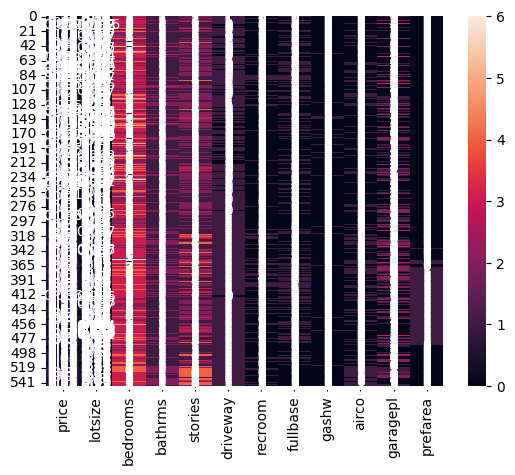

In [50]:
import seaborn as sns
sns.heatmap(df1, annot=True)